In [235]:
import json
import pandas as pd

from datetime import datetime

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter
with open('./stopwords/cn_stopwords.txt','r') as f:
    stopwords = f.read().splitlines() 
    f.close()
    
extend_stopwords = ["说","会","10","20","没","里","C","12",".",
                   "11", "男子", "女子"]
stopwords.extend(extend_stopwords)

import xmnlp

xmnlp.set_model('../model/xmnlp-onnx-models')

In [213]:
# def load_dataset(path:str,start:str,end:str):
#     data=pd.DataFrame()
#     dates = pd.date_range(start,end).strftime("%Y-%m-%d").to_list()

#     for date in dates:
#         with open (path+date+r'.json','r') as file:
#             topics = json.load(file)
#             file.close()
#             topics = pd.DataFrame(topics)
#             topics['date'] = date
#             data = pd.concat((data,topics))
            
#     return data

# start = '2020-11-24'
# end = '2023-01-03'
# path = "../data/raw/"
# data = load_dataset(path,start,end)

data = pd.read_csv('../data/processed/data_xmnlp.csv')

In [283]:
# HanLP
import hanlp
hanlp.pretrained.tok.ALL

{'SIGHAN2005_PKU_CONVSEG': 'https://file.hankcs.com/hanlp/tok/sighan2005-pku-convseg_20200110_153722.zip',
 'SIGHAN2005_MSR_CONVSEG': 'https://file.hankcs.com/hanlp/tok/convseg-msr-nocrf-noembed_20200110_153524.zip',
 'CTB6_CONVSEG': 'https://file.hankcs.com/hanlp/tok/ctb6_convseg_nowe_nocrf_20200110_004046.zip',
 'PKU_NAME_MERGED_SIX_MONTHS_CONVSEG': 'https://file.hankcs.com/hanlp/tok/pku98_6m_conv_ngram_20200110_134736.zip',
 'LARGE_ALBERT_BASE': 'https://file.hankcs.com/hanlp/tok/large_corpus_cws_albert_base_20211228_160926.zip',
 'SIGHAN2005_PKU_BERT_BASE_ZH': 'https://file.hankcs.com/hanlp/tok/sighan2005_pku_bert_base_zh_20201231_141130.zip',
 'COARSE_ELECTRA_SMALL_ZH': 'https://file.hankcs.com/hanlp/tok/coarse_electra_small_20220616_012050.zip',
 'FINE_ELECTRA_SMALL_ZH': 'https://file.hankcs.com/hanlp/tok/fine_electra_small_20220615_231803.zip',
 'CTB9_TOK_ELECTRA_SMALL': 'https://file.hankcs.com/hanlp/tok/ctb9_electra_small_20220215_205427.zip',
 'CTB9_TOK_ELECTRA_BASE': 'http:/

In [284]:
tok = hanlp.load(hanlp.pretrained.tok.COARSE_ELECTRA_SMALL_ZH)
tok

100%  43.5 MiB 324.7 KiB/s ETA:  0 s [=========================================]
Decompressing /Users/Ray/.hanlp/tok/coarse_electra_small_20220616_012050.zip to /Users/Ray/.hanlp/tok
100%  26.7 KiB  26.7 KiB/s ETA:  0 s [=========================================]
Decompressing /Users/Ray/.hanlp/utils/char_table_20210602_202632.json.zip to /Users/Ray/.hanlp/utils
100%  41.2 KiB  41.2 KiB/s ETA:  0 s [=========================================]
Decompressing /Users/Ray/.hanlp/transformers/electra_zh_small_20210706_125427.zip to /Users/Ray/.hanlp/transformers


In [285]:
tok_fine = hanlp.load(hanlp.pretrained.tok.FINE_ELECTRA_SMALL_ZH)
tok_fine

100%  43.5 MiB   1.3 MiB/s ETA:  0 s [=========================================]
Decompressing /Users/Ray/.hanlp/tok/fine_electra_small_20220615_231803.zip to /Users/Ray/.hanlp/tok


In [198]:
# Create a new feature 'topic_length'
data['topic_length'] = data.title.apply(lambda x: len(list(x)))

<AxesSubplot:>

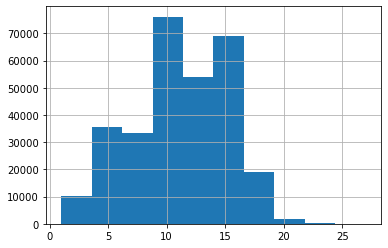

In [199]:
data['topic_length'].hist()

In [200]:
data['topic_length'].describe()

count    299272.000000
mean         11.029976
std           4.013539
min           1.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          27.000000
Name: topic_length, dtype: float64

In [212]:
# def tokenization(sent:str):
#     tokens = xmnlp.seg(sent)
#     return tokens

# def ner(sent:str):
#     ners = xmnlp.ner(sent)
#     return ners

# # Tokenization
# data['tokens'] = data['title'].apply(lambda x: tokenization(x))

# # Named-entity recognition
# data['ners'] = data['title'].apply(lambda x: ner(x))

# # Save dataset
# import csv
# data.to_csv('../data/processed/data_xmnlp.csv',index=False)

In [214]:
data['date'] = data['date'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

from ast import literal_eval
data['tokens'] = data['tokens'].apply(lambda token: literal_eval(token))
data['ners'] = data['ners'].apply(lambda ner: literal_eval(ner))

In [215]:
tokens = []
for token in data.tokens:
    tokens.extend(token)

len(tokens)

1779190

In [219]:
def get_freq(tokens,stopwords):
    freq = Counter(tokens)
    for stopword in stopwords:
        try:
            del freq[stopword]
        except:
            continue
    
    return freq

In [236]:
condition1 = data['date'] > '2021'
condition2 = data['date'] < '2022'

year2021 = data[condition1 & condition2]
tokens2021 = []

for token in year2021.tokens:
    tokens2021.extend(token)

print(len(tokens2021))

freq2021 = get_freq(tokens2021,stopwords)

592607


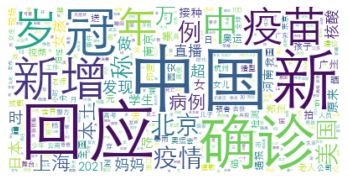

In [237]:
wc = WordCloud(background_color="white", max_words=1000,font_path = '/System/Library/Fonts/STHeiti Light.ttc')
# generate word cloud
wc.generate_from_frequencies(freq2021)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [238]:
condition1 = data['date'] > '2022'
condition2 = data['date'] < '2023'

year2022 = data[condition1 & condition2]
tokens2022 = []

for token in year2022.tokens:
    tokens2022.extend(token)

print(len(tokens2022))

freq2022 = get_freq(tokens2022,stopwords)

1102991


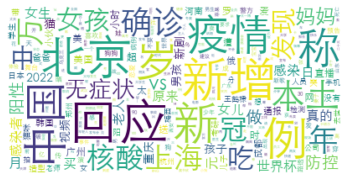

In [239]:
wc = WordCloud(background_color="white", max_words=1000,font_path = '/System/Library/Fonts/STHeiti Light.ttc')
# generate word cloud
wc.generate_from_frequencies(freq2022)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [240]:
freq2021.most_common(100)

[('中国', 2342),
 ('回应', 2115),
 ('新', 1851),
 ('确诊', 1572),
 ('冠', 1354),
 ('新增', 1336),
 ('岁', 1236),
 ('疫苗', 1217),
 ('年', 1153),
 ('中', 1077),
 ('疫情', 1030),
 ('北京', 1017),
 ('美国', 944),
 ('例', 915),
 ('称', 900),
 ('万', 832),
 ('上海', 793),
 ('本土', 767),
 ('病例', 739),
 ('发现', 716),
 ('超', 638),
 ('做', 635),
 ('核酸', 632),
 ('时', 631),
 ('妈妈', 626),
 ('日本', 619),
 ('直播', 602),
 ('女孩', 601),
 ('学生', 591),
 ('原来', 589),
 ('吃', 586),
 ('接种', 575),
 ('河南', 569),
 ('2021', 565),
 ('美', 548),
 ('女', 545),
 ('南京', 530),
 ('广州', 522),
 ('拍', 509),
 ('奥运', 499),
 ('我国', 489),
 ('通报', 487),
 ('郑州', 481),
 ('全国', 471),
 ('孩子', 466),
 ('日', 465),
 ('送', 460),
 ('遭', 460),
 ('元', 455),
 ('视频', 445),
 ('老人', 443),
 ('印度', 439),
 ('天', 436),
 ('西安', 435),
 ('检测', 430),
 ('现场', 429),
 ('晒', 414),
 ('想', 413),
 ('女儿', 412),
 ('爱', 410),
 ('奥运会', 410),
 ('分', 409),
 ('预告', 408),
 ('建议', 406),
 ('道歉', 405),
 ('造型', 405),
 ('太', 404),
 ('老师', 402),
 ('成都', 402),
 ('阳性', 400),
 ('获', 398),
 ('东京', 394),
 ('

In [241]:
freq2022.most_common(100)

[('回应', 3732),
 ('新增', 3269),
 ('北京', 3142),
 ('例', 3129),
 ('新', 3014),
 ('中国', 2927),
 ('岁', 2727),
 ('称', 2717),
 ('疫情', 2714),
 ('本土', 2602),
 ('确诊', 2376),
 ('年', 2124),
 ('万', 1980),
 ('核酸', 1924),
 ('冠', 1882),
 ('上海', 1850),
 ('吃', 1609),
 ('女孩', 1549),
 ('发现', 1546),
 ('中', 1471),
 ('无症状', 1462),
 ('妈妈', 1427),
 ('vs', 1360),
 ('防控', 1357),
 ('做', 1348),
 ('阳性', 1313),
 ('世界杯', 1301),
 ('元', 1286),
 ('感染者', 1239),
 ('原来', 1235),
 ('真的', 1202),
 ('买', 1188),
 ('日', 1148),
 ('女生', 1131),
 ('女儿', 1116),
 ('感染', 1092),
 ('老人', 1058),
 ('月', 1055),
 ('孩子', 1029),
 ('2022', 1023),
 ('新剧', 984),
 ('猫', 980),
 ('视频', 970),
 ('男孩', 963),
 ('重庆', 945),
 ('直播', 943),
 ('网', 927),
 ('美国', 919),
 ('广州', 913),
 ('美', 906),
 ('时', 893),
 ('爱', 893),
 ('超', 884),
 ('小时', 881),
 ('送', 879),
 ('罗', 876),
 ('太', 872),
 ('通报', 869),
 ('爸爸', 818),
 ('韩国', 816),
 ('河南', 811),
 ('成都', 805),
 ('俄', 804),
 ('小伙', 795),
 ('遭', 792),
 ('造型', 783),
 ('儿子', 780),
 ('没有', 754),
 ('日本', 749),
 ('哭', 741),
 

In [118]:
freq = get_freq(tokens,stopwords)
# freq.most_common(100)

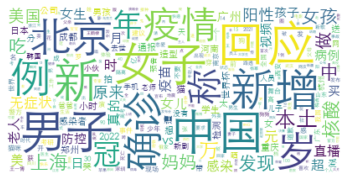

In [102]:
wc = WordCloud(background_color="white", max_words=1000,font_path = '/System/Library/Fonts/STHeiti Light.ttc')
# generate word cloud
wc.generate_from_frequencies(freq)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [262]:
keys2022 = []
keys2022.extend([i[0] for i in freq2022.most_common(500)])

keys2021 = []
keys2021.extend([i[0] for i in freq2021.most_common(500)])

In [263]:
set(keys2022) - set(keys2021)

{'00',
 '19',
 '2022',
 '2023',
 '22',
 '23',
 '25',
 '80',
 '95',
 'iPhone',
 'iPhone14',
 'vs',
 '一次',
 '万里',
 '丈夫',
 '上线',
 '不会',
 '不再',
 '世界杯',
 '主',
 '主人',
 '乌',
 '乌克兰',
 '事',
 '二',
 '二十大',
 '仅',
 '今日',
 '今晚',
 '任嘉伦',
 '会面',
 '传',
 '佩',
 '俄',
 '俄罗斯',
 '偷',
 '克罗地亚',
 '公主',
 '内马尔',
 '冬奥',
 '冰墩墩',
 '分享',
 '分手',
 '剧',
 '区',
 '半夏',
 '单',
 '卡',
 '卡塔尔',
 '卿卿',
 '发烧',
 '变',
 '名单',
 '四',
 '回归',
 '回来',
 '国庆',
 '增',
 '大会',
 '大爷',
 '大结局',
 '天津',
 '夫妻',
 '女友',
 '姆巴',
 '实现',
 '封',
 '小狗',
 '小猫',
 '居家',
 '崩溃',
 '巴西',
 '布洛芬',
 '帅',
 '年后',
 '幸福',
 '度',
 '弟弟',
 '归途',
 '录',
 '德国',
 '恢复',
 '患',
 '懂',
 '战',
 '找',
 '抗原',
 '抱',
 '拒',
 '换',
 '控',
 '支持',
 '收到',
 '放',
 '教',
 '新剧',
 '日常',
 '是否',
 '普京',
 '曝',
 '最佳',
 '最新',
 '李峋',
 '梅西',
 '歌',
 '每天',
 '水',
 '沉香',
 '法国',
 '火',
 '王牌',
 '王鹤棣',
 '球迷',
 '男友',
 '男童',
 '疑',
 '症状',
 '皮肤',
 '码',
 '研究',
 '突然',
 '第一次',
 '终于',
 '罗',
 '羊',
 '老板',
 '脱口秀',
 '药',
 '萌',
 '虞书欣',
 '见',
 '角色',
 '调整',
 '谷爱凌',
 '质疑',
 '赛',
 '赵露思',
 '越',
 '跨',
 '踩踏',
 '辟谣',
 '部分',
 '重要',
 '钱',
 '长沙'

In [264]:
set(keys2021) - set(keys2022)

{'200',
 '2020',
 '2021',
 '31',
 '70',
 'vlog',
 '东京',
 '中方',
 '云南',
 '人类',
 '令',
 '价格',
 '伤',
 '使用',
 '修',
 '免费',
 '全红婵',
 '全运会',
 '全面',
 '关晓彤',
 '创',
 '创造',
 '十',
 '华为',
 '华晨',
 '印度',
 '历史',
 '厦门',
 '反',
 '反应',
 '受伤',
 '变异',
 '号',
 '合照',
 '吐槽',
 '否认',
 '吴亦凡',
 '周',
 '哥哥',
 '国人',
 '地区',
 '基金',
 '声明',
 '大连',
 '大陆',
 '太空',
 '央视',
 '奥运',
 '奥运会',
 '好笑',
 '妆',
 '姐姐',
 '学校',
 '安徽',
 '小朋友',
 '山河',
 '崩',
 '工作室',
 '币',
 '年度',
 '库里',
 '张哲瀚',
 '影响',
 '心疼',
 '总统',
 '患者',
 '感谢',
 '成绩',
 '戴',
 '抓',
 '拜登',
 '接种',
 '提醒',
 '救援',
 '教师',
 '教育',
 '方式',
 '明星',
 '春节',
 '暴雨',
 '曝光',
 '最大',
 '机场',
 '杀',
 '李佳琦',
 '杨',
 '杨紫',
 '樊振东',
 '模仿',
 '毒株',
 '比特',
 '比赛',
 '毕业',
 '河北',
 '涉',
 '游客',
 '演技',
 '照片',
 '特斯拉',
 '特朗普',
 '牺牲',
 '王嘉尔',
 '王源',
 '病毒',
 '百年',
 '省区市',
 '看待',
 '石家庄',
 '破防',
 '禁止',
 '福建',
 '粉',
 '粉丝',
 '系',
 '紧急',
 '组',
 '绝',
 '网络',
 '群',
 '老',
 '腾讯',
 '舞',
 '航天员',
 '苏炳添',
 '英国',
 '营',
 '蔡徐坤',
 '薇娅',
 '行',
 '袁隆平',
 '被困',
 '计划',
 '训练',
 '记者',
 '许昕',
 '评',
 '路',
 '身亡',
 '达',
 '运动员',
 '选手',
 '郭',
 '酒店',
 

### Stickies

In [276]:
stickies = pd.DataFrame()
for day in data.date.unique():
    condition = data.date == day
    sticky = data[condition].iloc[0]
    stickies = stickies.append(sticky)

In [278]:
tokens_stickies = []

for token in stickies.tokens:
    tokens_stickies.extend(token)

print(len(tokens_stickies))

freq_stickies = get_freq(tokens_stickies,stopwords)

4144


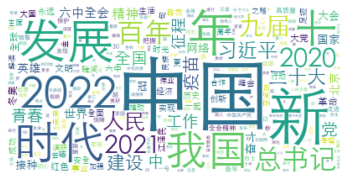

In [279]:
wc = WordCloud(background_color="white", max_words=1000,font_path = '/System/Library/Fonts/STHeiti Light.ttc')
# generate word cloud
wc.generate_from_frequencies(freq_stickies)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [281]:
freq_stickies.most_common(500)

[('中国', 92),
 ('新', 52),
 ('年', 32),
 ('发展', 30),
 ('时代', 25),
 ('2022', 24),
 ('我国', 22),
 ('十', 22),
 ('总书记', 22),
 ('百年', 22),
 ('2020', 19),
 ('2021', 18),
 ('九届', 18),
 ('人民', 17),
 ('习近平', 17),
 ('二十大', 17),
 ('建设', 16),
 ('疫苗', 15),
 ('全国', 13),
 ('党', 13),
 ('工作', 12),
 ('中', 12),
 ('青春', 12),
 ('征程', 12),
 ('精神', 12),
 ('六中全会', 12),
 ('国家', 11),
 ('英雄', 11),
 ('世界', 11),
 ('奋斗', 11),
 ('网络', 11),
 ('北京', 11),
 ('冠', 10),
 ('接种', 10),
 ('大会', 10),
 ('全球', 9),
 ('冬奥', 9),
 ('革命', 9),
 ('红色', 8),
 ('大党', 8),
 ('文明', 8),
 ('瞬间', 7),
 ('安全', 7),
 ('足迹', 7),
 ('句', 7),
 ('经济', 7),
 ('一起', 7),
 ('实现', 7),
 ('更', 7),
 ('大国', 7),
 ('生活', 7),
 ('成功', 7),
 ('事业', 7),
 ('永远', 7),
 ('未来', 7),
 ('创新', 7),
 ('全面', 7),
 ('峰会', 7),
 ('历史', 7),
 ('六中', 7),
 ('自我', 7),
 ('时光', 7),
 ('江泽民', 7),
 ('金', 6),
 ('加强', 6),
 ('推动', 6),
 ('解读', 6),
 ('周年', 6),
 ('空间站', 6),
 ('考察', 6),
 ('调研', 6),
 ('行动', 6),
 ('民族', 6),
 ('之路', 6),
 ('合作', 6),
 ('主席', 6),
 ('会晤', 6),
 ('伟业', 6),
 ('全会精神', 6),
 ('高质量', 6)